# Trend Predicting

* **Problem**: Trend Predicting based on user behaviors
* **Description**: 
  * Create online preference index for each major product group
  * Predict demand trends and draw insights by product group
  * Suggest new service from 1), 2)
* **Dataset**: ? non-numeric column, and ? numeric columns
  * ? : ?
  * Non-numeric columns:
    * 16 non-numeric columns : ?
  * Numeric columns: 
    * 104 numeric columns : ?
 


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import os
import datetime

In [3]:
path = Path().resolve().parents[0]
product = pd.read_csv(os.path.join(path, 'Dataset', 'Product.csv'))
search1 = pd.read_csv(os.path.join(path, 'Dataset', 'Search1.csv'))
search2 = pd.read_csv(os.path.join(path, 'Dataset', 'Search2.csv'))
custom = pd.read_csv(os.path.join(path, 'Dataset', 'Custom.csv'))
session = pd.read_csv(os.path.join(path, 'Dataset', 'Session.csv'))
master = pd.read_csv(os.path.join(path, 'Dataset', 'Master.csv'))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print('product shape : ', product.shape)
print('search1 shape : ', search1.shape)
print('search2 shape : ', search2.shape)
print('custom shape : ', custom.shape)
print('session shape : ', session.shape)
print('master shape : ', master.shape)

product shape :  (5024906, 8)
search1 shape :  (2884943, 4)
search2 shape :  (8051172, 3)
custom shape :  (671679, 3)
session shape :  (2712907, 9)
master shape :  (847652, 5)


In [5]:
search1 = pd.merge(search1, session)
search1 = search1.drop(['CLNT_ID', 'SESS_ID', 'TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V', 'DVC_CTG_NM', 'ZON_NM', 'CITY_NM', 'SESS_SEQ'], axis=1)

In [6]:
search1.head()

,KWD_NM,SEARCH_CNT,SESS_DT
0,빌리프 아이크림,6,20180603
1,헤라 베이스,1,20180603
2,헤라,1,20180603
3,프리메라 마스크팩,3,20180723
4,여성청결제,1,20180723


In [7]:
search2.head()

,SESS_DT,KWD_NM,SEARCH_CNT
0,20180407,닥스원피스,8
1,20180407,닥터지 브라이트닝,1
2,20180407,달팡 인트랄,2
3,20180407,대상트,1
4,20180407,더블유닷,6


In [8]:
print(search2['KWD_NM'].shape)
print(search2['KWD_NM'].unique().shape)
search2['KWD_NM'].unique()

(8051172,)
(84607,)


array(['닥스원피스', '닥터지 브라이트닝', '달팡 인트랄', ..., 'silicone', '첨이첨이아동양면내복',
       'daks kids'], dtype=object)

In [9]:
print(search1['KWD_NM'].shape)
print(search1['KWD_NM'].unique().shape)
search1['KWD_NM'].unique()

(2884943,)
(81539,)


array(['빌리프 아이크림', '헤라 베이스', '헤라', ..., '소니 55mm', '기계식', '방진마스크'],
      dtype=object)

In [10]:
search2['KWD_NM'].value_counts()

베이직하우스            183
남성슬리퍼             183
보브티셔츠             183
소다여성화             183
아일랜드식탁            183
페리미츠 원피스          183
게스 청바지            183
헤지스레이디스 원피스       183
아리따움              183
비씨비지 원피스          183
첨이첨이 팬티           183
홍진경더김치            183
엘르이너웨어            183
클로비스              183
캘러웨이남성골프웨어        183
구찌지갑              183
팩                 183
멜빵바지              183
행텐여성              183
여성 크로스백           183
플라잉타이거코펜하겐        183
발렌시아가 신발          183
두유                183
투미백팩              183
클럽모나코             183
여성팬티              183
루즈앤라운지가방          183
여성가디건             183
플라잉타이거            183
오즈키즈              183
                 ... 
T.I FOR MEN         6
[아메리칸이글(진)]남성       6
yj8fbs107           5
519611746           5
508551136           5
플레이키즈프로 나이키 모자      5
DOLCE               5
실패검색                4
왓츠 업                4
jelispoon           4
디아도라 분당점            4
라운드카라 자켓            4
535280485           3
에이지투웨니스 한정판         3
bestibelli

In [11]:
search1['KWD_NM'].value_counts()

원피스             7459
생수              6091
뉴발란스키즈          5057
티셔츠             5054
에고이스트           4933
지오다노            4774
크록스             4738
여성샌들            4616
나스              4582
아디다스키즈          4486
입생로랑            4437
정관장             4300
타미힐피거여성         4282
블루독             4267
설화수             4253
빈폴레이디스          4223
아디다스            4199
블라우스            4174
에이치커넥트          4000
나이키             3951
무료배송            3794
노스페이스키즈         3618
나이키운동화          3589
맥               3499
헤지스레이디스         3474
남성              3399
여성              3323
키엘              3274
써스데이아일랜드        3169
에스티로더           3100
                ... 
자동차 목쿠션            1
보태가베네타카드지갑         1
블루래빗 사운드북          1
phenom             1
여성메탈손목시계           1
리바이스311            1
이쯔포포               1
숄더 크로스백            1
공기압다리마사지기          1
쓰리심                1
브로우 젤              1
발퀴레                1
비비안이지웨어            1
명품세일               1
대리석티비다이            1
파크론퓨어버블1 1         1
편백나무쇼파       

In [49]:
def show_trend(df1, df2, name) :
    temp1 = df1[df1['KWD_NM']==name]
    temp1['SEARCH_CNT'] = temp1['SEARCH_CNT'].astype('float')
    temp1 = temp1.sort_values(by=['SESS_DT']) 
    firstday = str_to_datetime(temp1['SESS_DT'].iloc[0])
    for idx in range(len(temp1)) :
        temp1['SESS_DT'].iloc[idx] = int((str_to_datetime(temp1['SESS_DT'].iloc[idx]) - firstday).days)
    
    temp2 = df2[df2['KWD_NM']==name]
    temp2['SEARCH_CNT'] = temp2['SEARCH_CNT'].astype('float')
    temp2 = temp2.sort_values(by=['SESS_DT'])
    firstday = str_to_datetime(temp2['SESS_DT'].iloc[0])
    for idx in range(len(temp2)) :
        temp2['SESS_DT'].iloc[idx] = int((str_to_datetime(temp2['SESS_DT'].iloc[idx]) - firstday).days)
    
    
    
    
    plt.figure(figsize=(15,5))
    sns.scatterplot(temp1['SESS_DT'], temp1['SEARCH_CNT'], color='blue')
    sns.scatterplot(temp2['SESS_DT'], temp2['SEARCH_CNT'], color='green')
    plt.show()
    
    plt.figure(figsize=(15,5))
    sns.lineplot(temp1['SESS_DT'], temp1['SEARCH_CNT'], color='blue')
    sns.lineplot(temp2['SESS_DT'], temp2['SEARCH_CNT'], color='green')
    plt.show()
    
    return temp1, temp2
    
def str_to_datetime(item) :
    year = int(str(item)[0:4])
    month = int(str(item)[4:6])
    day = int(str(item)[6:8])
    return datetime.date(year, month, day)
    
    
#data_search1, data_search2 = show_trend(search1, search2, '에스티로더')

In [17]:
def transform_dataset(df, name) : 
    temp = df[df['KWD_NM']==name].copy()
    print(temp.shape)
    temp['SEARCH_CNT'] = temp['SEARCH_CNT'].astype('str').str.replace(',', '').astype('float')
    temp = temp.sort_values(by=['SESS_DT'])
    
    x = df['SESS_DT'].copy()
    y = df['SEARCH_CNT'].copy()
    temp = pd.concat([x, y], axis=1)
    temp = temp.groupby(['SESS_DT']).first().reset_index()
    temp.index = temp['SESS_DT']
    temp = temp.drop(['SESS_DT'], axis=1)
    
    temp = temp.reset_index(drop = True)
    idx = range(0, len(temp))
    temp = temp.reindex(idx, fill_value=0)
    return temp

data_search1 = transform_dataset(search1, '에스티로더')
data_search2 = transform_dataset(search2, '에스티로더')

(3100, 3)
(183, 3)


In [29]:
data_search1.head()

,SEARCH_CNT
0,1
1,2
2,1
3,6
4,1


In [30]:
data_search2.head()

,SEARCH_CNT
0,6
1,1
2,5
3,5
4,1


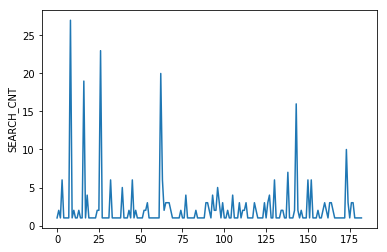

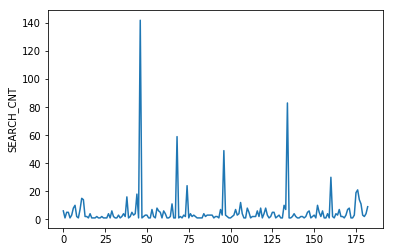

In [41]:
sns.lineplot(data_search1.index, data_search1['SEARCH_CNT'].astype(float))
plt.show()
sns.lineplot(data_search2.index, data_search2['SEARCH_CNT'].astype(float))
plt.show()

In [36]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [48]:
dataset = data_search1.astype('float32').values
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

#scaler = MinMaxScaler(feature_range=(0,1))
#scaler.fit(train)
#train = scaler.transform(train)
#test = scaler.transform(test)

#print(train, test)

def create_dataset(dataset, look_back=1) :
    X, Y = [], []
    for i in range(len(dataset)-look_back-1) :
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x_train = x_train.reshape(x_train.shape[0], look_back, 1)
x_test = x_test.reshape(x_test.shape[0], look_back, 1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
sgd = SGD(lr=0.1, decay=1e-2, momentum=0.9)
batch_size = 1

model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', 
              optimizer=adam)
history = model.fit(x_train, y_train,
         epochs=100,
         batch_size=batch_size, 
         verbose=2)

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

122 61
(120, 1)
(120,)
(59, 1)
(59,)
(120, 1, 1)
(120,)
(59, 1, 1)
(59,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


NameError: name 'adam' is not defined

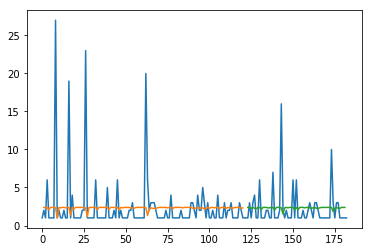

In [47]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

#print(train_predict)
train_predict = scaler.inverse_transform(train_predict)
#y_train = scaler.inverse_transform(y_train.reshape(120, 1))
test_predict = scaler.inverse_transform(test_predict)
#y_test = scaler.inverse_transform(y_test.reshape(y_test.shape[0], 1))

#trainScore = math.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
#testScore = math.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
#print('Train Score: %.2f RMSE' % (trainScore))
#print('Test Score: %.2f RMSE' % (testScore))

train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(dataset)-1, :] = test_predict

plt.plot(scaler.inverse_transform(dataset))
#plt.plot(dataset)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()